# Heat tracer interpretation using a constant dispersivity model (CDM)
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of heat tracer data set from the Grimsel Test Site.

Copyright 2020-2021 - Bernard Brixel & Nathan Dutler 

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.
   

In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Model implementation

In [2]:
CDM=ht.CDMHeat()

[1.71280451e-50 2.78051673e-50 4.50345880e-50 7.27736947e-50
 1.17331539e-49 1.88743396e-49 3.02935337e-49 4.85125141e-49
 7.75153623e-49 1.23582334e-48 1.96591190e-48 3.12043527e-48
 4.94213004e-48 7.81025834e-48 1.23161006e-47 1.93794741e-47
 3.04281815e-47 4.76737764e-47 7.45344300e-47 1.16281973e-46
 1.81029841e-46 2.81238310e-46 4.36003046e-46 6.74527215e-46
 1.04137825e-45 1.60442986e-45 2.46683614e-45 3.78504722e-45
 5.79585907e-45 8.85694425e-45 1.35074581e-44 2.05584799e-44
 3.12277021e-44 4.73396128e-44 7.16224203e-44 1.08147592e-43
 1.62979212e-43 2.45131426e-43 3.67977345e-43 5.51318243e-43
 8.24416540e-43 1.23043287e-42 1.83290462e-42 2.72518715e-42
 4.04418590e-42 5.99029168e-42 8.85626620e-42 1.30690170e-41
 1.92498996e-41 2.83016006e-41 4.15330852e-41 6.08389511e-41
 8.89564040e-41 1.29832770e-40 1.89150131e-40 2.75072884e-40
 3.99311024e-40 5.78629762e-40 8.36988951e-40 1.20856968e-39
 1.74204828e-39 2.50662111e-39 3.60048231e-39 5.16273238e-39
 7.39007635e-39 1.056019

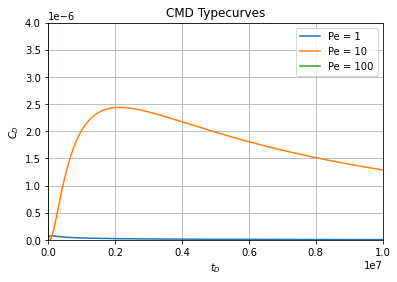

In [3]:
CDM.plot_typecurve()